<a href="https://colab.research.google.com/github/Digisalman239/Acne_Detection/blob/main/Acne0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset


Dataset URL: https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset
License(s): other
100% 242M/242M [00:15<00:00, 17.3MB/s]
100% 242M/242M [00:15<00:00, 16.7MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("5-flower-types-classification-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("./flower_dataset")

In [ ]:
import os
os.listdir("./flower_dataset")

['flower_images']

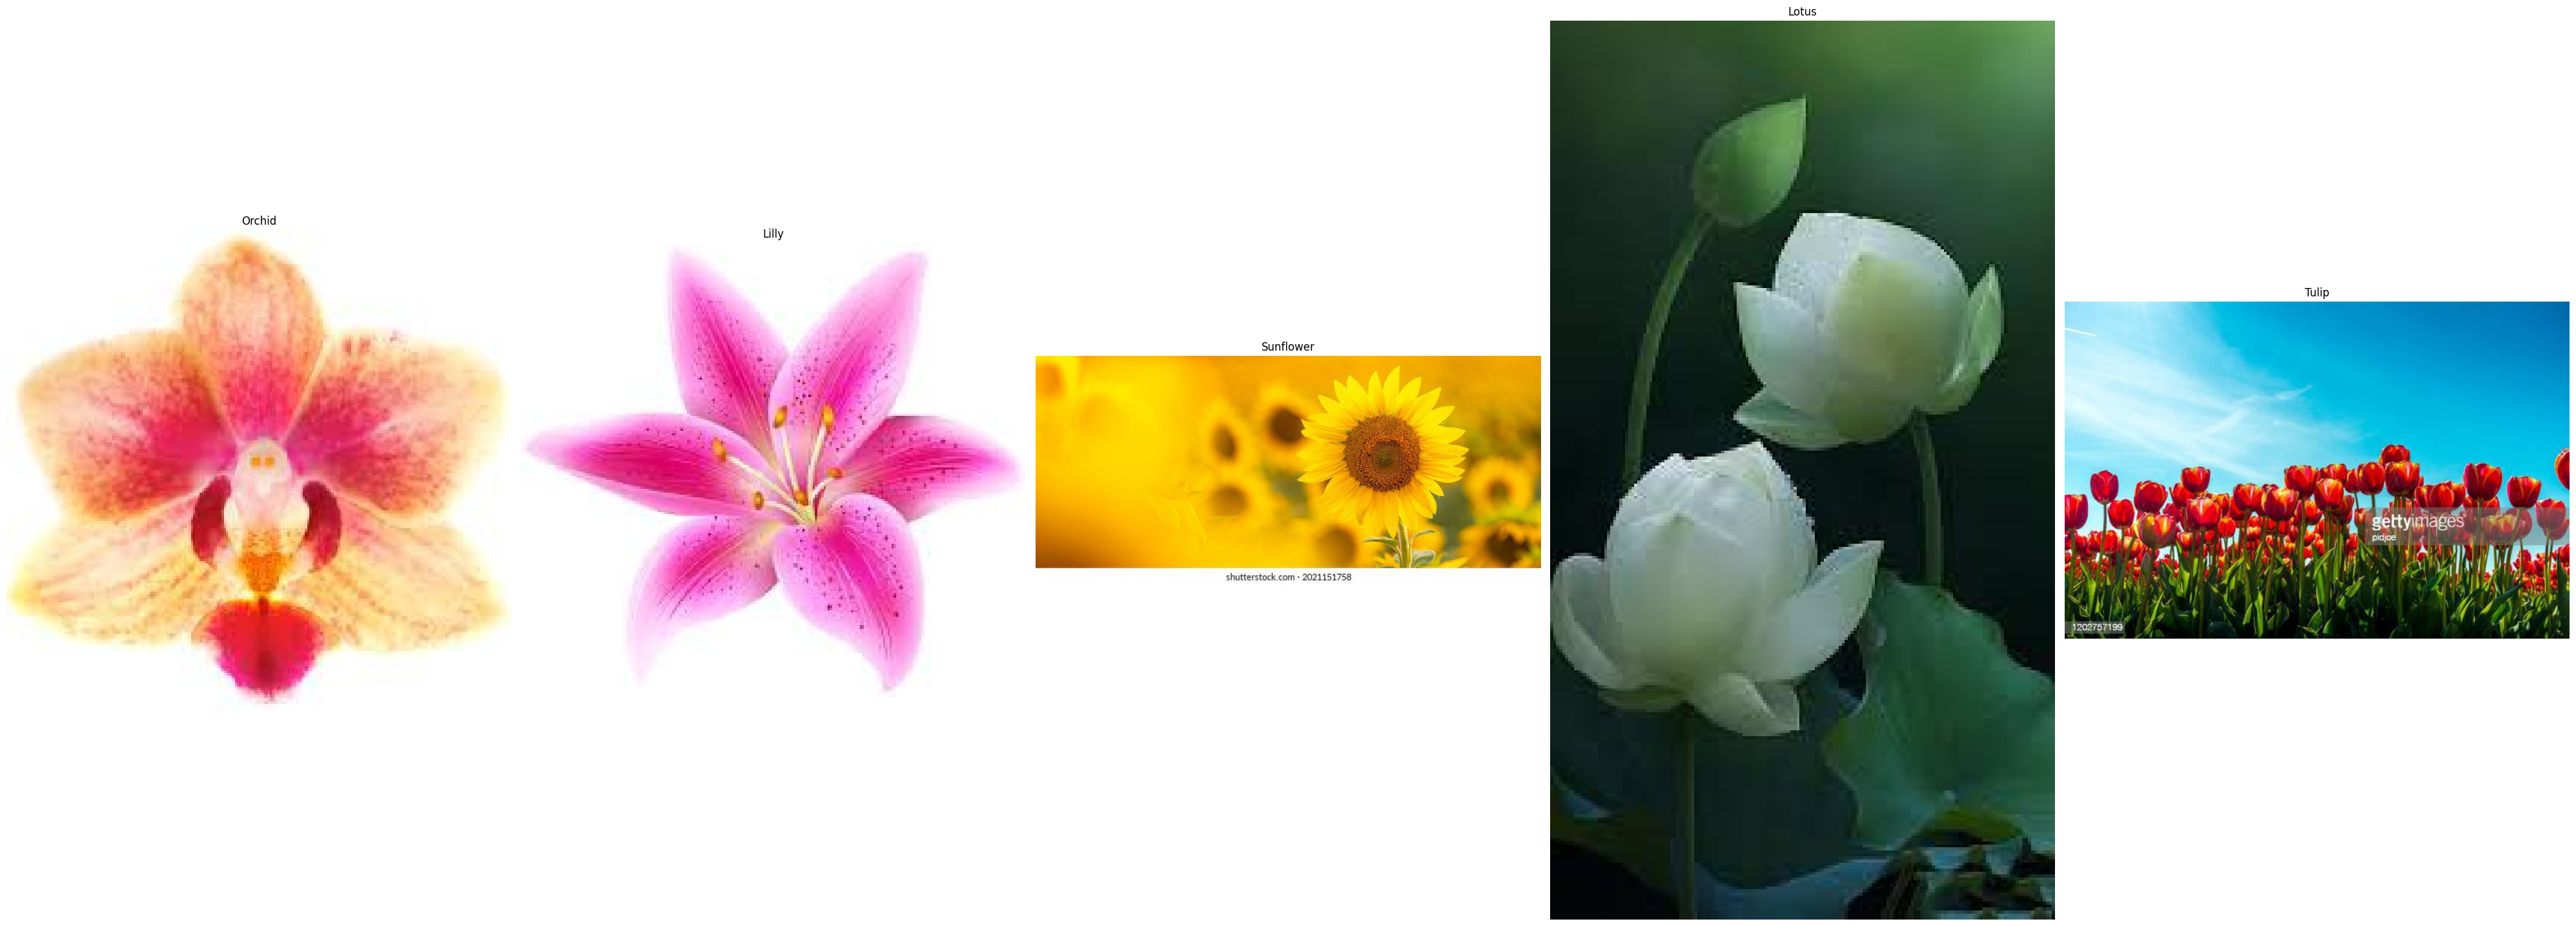

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

dataset_dir = './flower_dataset/flower_images'

categories = os.listdir(dataset_dir)

# Initialize a figure
plt.figure(figsize=(40, 40))

# Loop through the categories and display one image from each
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_dir, category)

    # Get the first image file in the category
    image_file = os.listdir(category_path)[0]
    image_path = os.path.join(category_path, image_file)

    # Open the image using PIL
    image = Image.open(image_path)

    # Plot the image
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(category, fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf

def augment(image, label):
    image = tf.image.random_flip_left_right(image)

    image = tf.image.random_brightness(image, max_delta=0.1)

    return image, label

# Load the dataset
data_dir = 'flower_dataset/flower_images'
img_height, img_width = 180, 180
batch_size = 32

# Creating the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Apply the augment function to the training dataset
train_ds = train_ds.map(augment)

train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 4999 files belonging to 5 classes.
Using 4000 files for training.


In [ ]:
img_height,img_width=180,180

val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 4999 files belonging to 5 classes.
Using 999 files for validation.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
resnet_model=Sequential()
from tensorflow.keras.applications import ResNet50
pretrained_model=ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(180,180,3),
    pooling='avg',
    classes=5,
    )
for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)
#resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(5,activation='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
resnet_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
#importing optimizer
from tensorflow.keras.optimizers import Adam
#Compiling model
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=10
history=resnet_model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 187ms/step - accuracy: 0.6435 - loss: 1.3538 - val_accuracy: 0.8729 - val_loss: 0.4092
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.8915 - loss: 0.3113 - val_accuracy: 0.8769 - val_loss: 0.3424
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.9370 - loss: 0.1978 - val_accuracy: 0.8979 - val_loss: 0.2986
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.9596 - loss: 0.1275 - val_accuracy: 0.9129 - val_loss: 0.2839
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 137ms/step - accuracy: 0.9741 - loss: 0.0901 - val_accuracy: 0.9279 - val_loss: 0.2357
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.9883 - loss: 0.0542 - val_accuracy: 0.9229 - val_loss: 0.2399
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.9849 - loss: 0.0479 - val_accuracy: 0.9219 - val_loss: 0.2523
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.9808 - loss: 0

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    """
    Plots the learning curves for training and validation metrics.

    Parameters:
    - history: Return value from model.fit() containing training history.
    """
    # Extract the history for accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'gs-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'gs-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


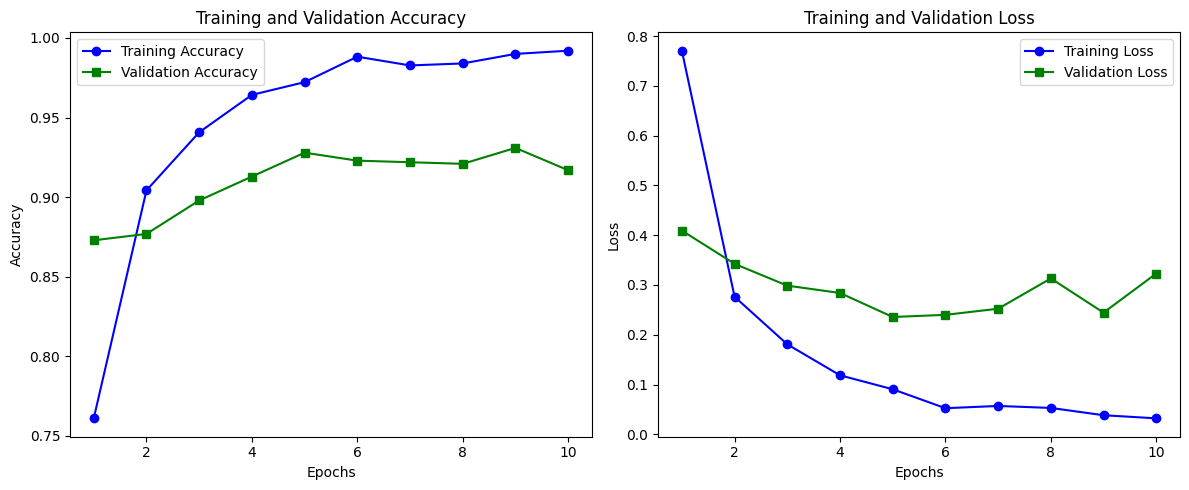

In [ ]:
plot_learning_curve(history)
